## Load Libraries Needed for Script

In [30]:
import os
import json
import zipfile
import pandas as pd

In [31]:
from pathlib import Path
from fastai.vision import ImageDataBunch, get_transforms, imagenet_stats

In [32]:
from arcgis.gis import GIS
from arcgis.learn import prepare_data, FeatureClassifier, classify_objects, Model

## Connect Notebook to ArcGIS for Python API

In [33]:
# Connect to AGOL Account using Connection Profile
gisURL = ""
gisLogin = ""
gisPW = ""

# ArcGIS for Python API Login
try:
    gis = GIS(url=gisURL, username=gisLogin, password=gisPW)
    print("Successfully logged in as: " + gis.properties.user.username)
except Exception as e:
    logging.basicConfig(filename=logFile, level=logging.ERROR)
    logging.error(f'Could not log into AGOL via ArcGIS for Python - Exit Program\n{e}')
    sys.exit("Program had a whoopsie")

Successfully logged in as: JCOS_Admin


## Prepare the training data

In [37]:
nameCSV = "PnotPTPhotos.csv"
folderLoc = r"M:\GIS\3_Resources\3_7_Scripts\Python\ML_ImageClassification_PersonNotPerson\TrainingData"

new_train_df = pd.read_csv(os.path.join(folderLoc, nameCSV))

In [38]:
new_train_df

photoFilePath photoLabel
0      PhotosFull\Cynical_1_20191015_1_SY_00034_n.JPG  NotPerson
1      PhotosFull\Cynical_1_20191015_1_SY_00035_p.JPG     Person
2      PhotosFull\Cynical_1_20191015_1_SY_00036_p.JPG     Person
3      PhotosFull\Cynical_1_20191015_1_SY_00037_p.JPG     Person
4      PhotosFull\Cynical_1_20191015_1_SY_00038_n.JPG  NotPerson
...                                               ...        ...
11258   PhotosFull\Sunshine_2_20210930_IMG_1355_p.JPG     Person
11259   PhotosFull\Sunshine_2_20210930_IMG_1356_p.JPG     Person
11260   PhotosFull\Sunshine_2_20210930_IMG_1357_p.JPG     Person
11261   PhotosFull\Sunshine_2_20210930_IMG_1358_p.JPG     Person
11262   PhotosFull\Sunshine_2_20210930_IMG_1359_p.JPG     Person

[11263 rows x 2 columns]

## Format Training Data

In [39]:
Path_df=Path(folderLoc)                                           # path to the downloaded data
data = ImageDataBunch.from_df(path=Path_df,
                              folder='',
                              df=new_train_df,
                              fn_col=0,
                              label_col=1,
                              valid_pct=0.2,
                              seed=42,
                              bs=16,
                              size=224,
                              num_workers=2).normalize(imagenet_stats)

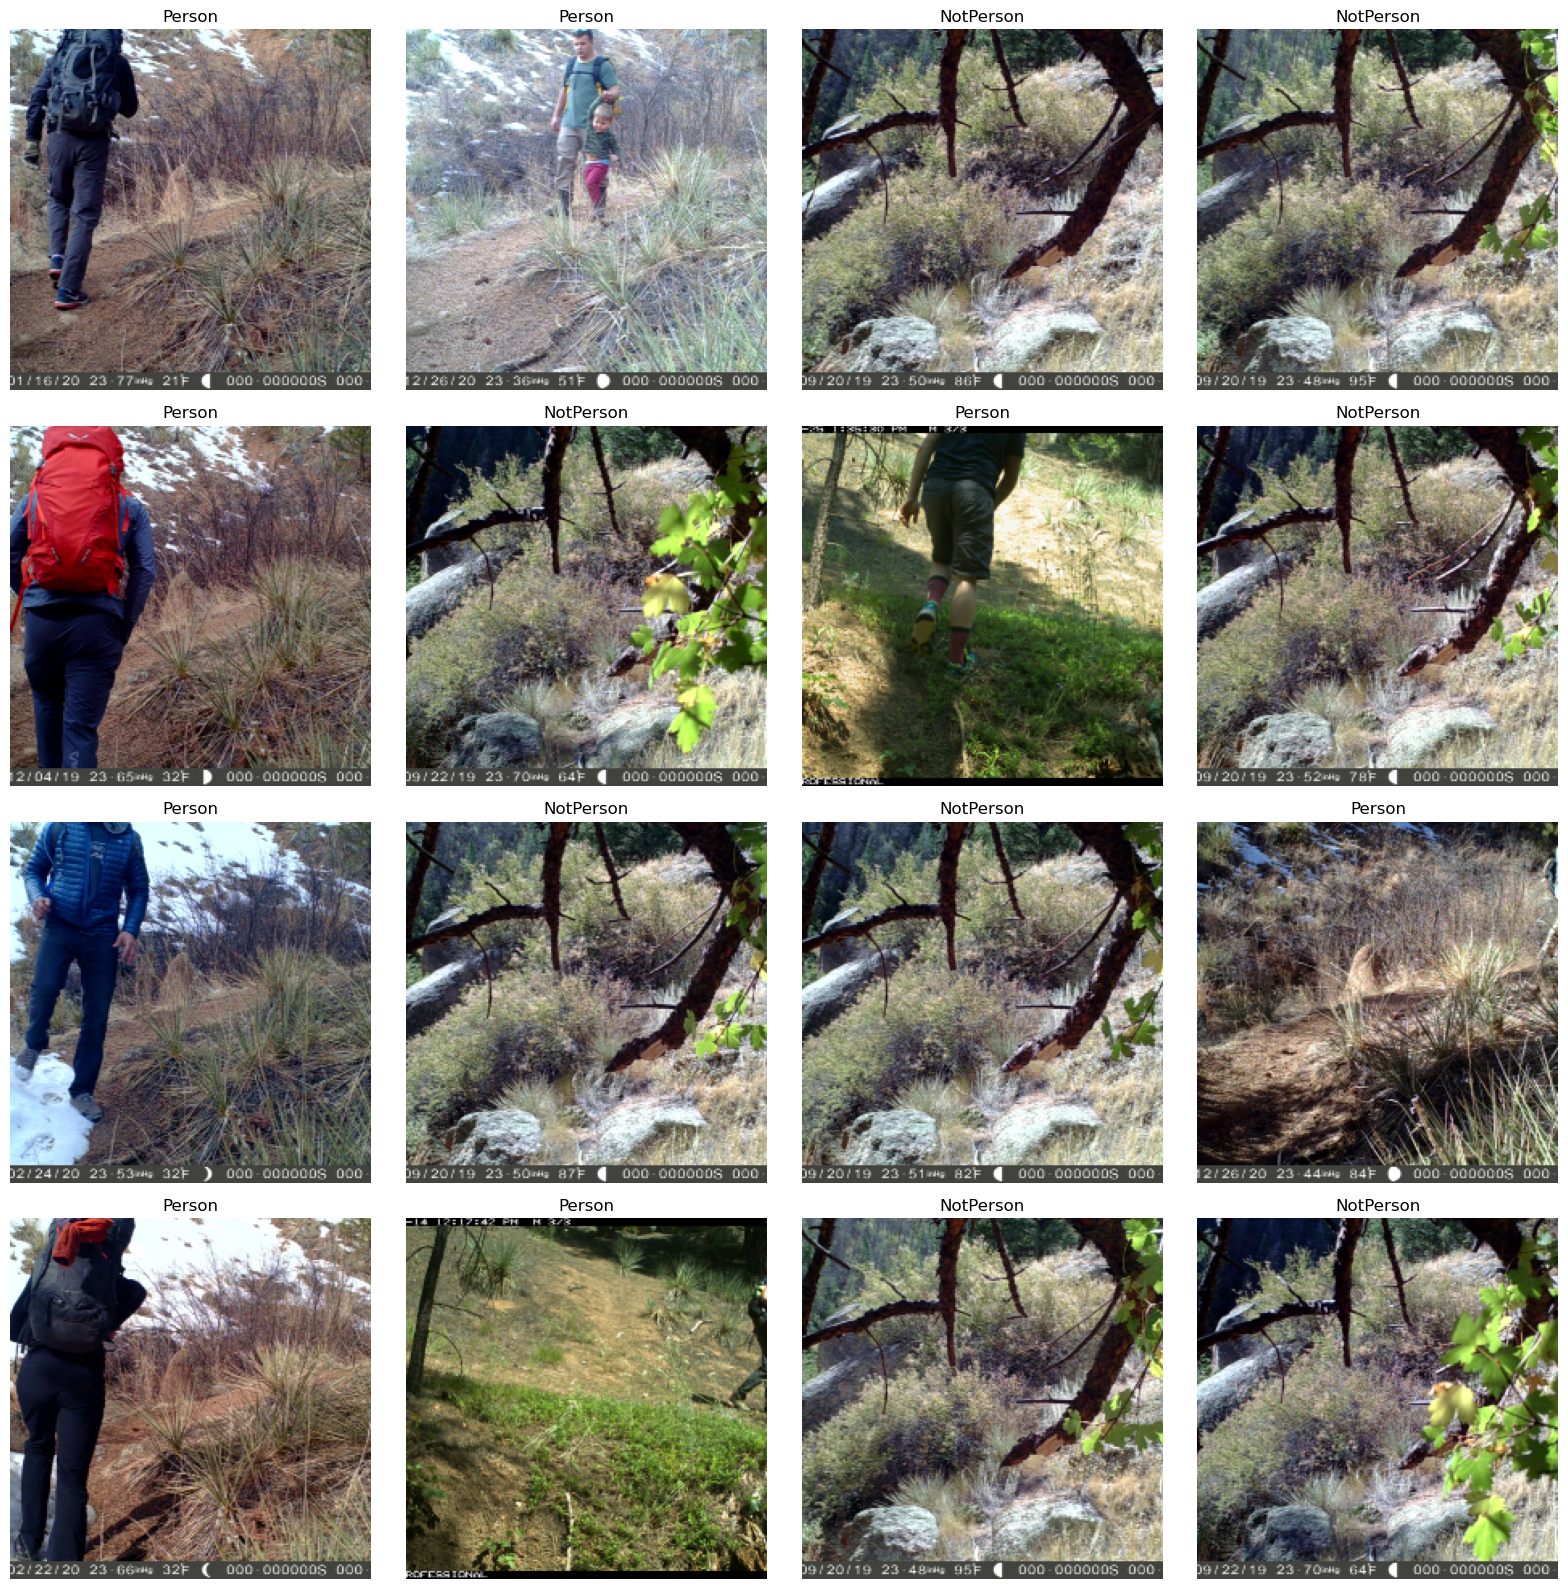

In [40]:
data.show_batch(5)

## Load Training Data into Deep Learning Model

In [41]:
model = FeatureClassifier(data)

## Identify the propery learning rate to train the model

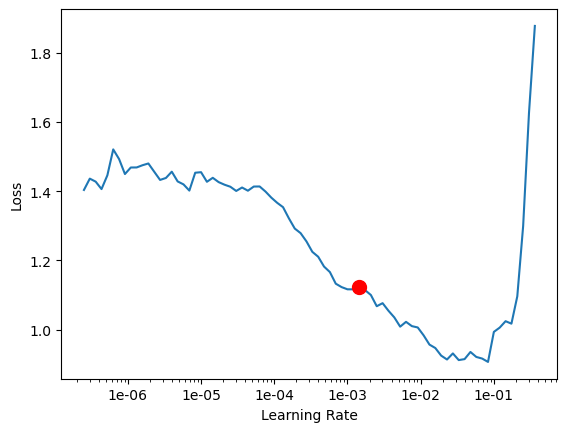

In [42]:
lr = model.lr_find()

In [43]:
lr

0.001445439770745928

## Train Model

In [44]:
model.fit(5, lr=lr)

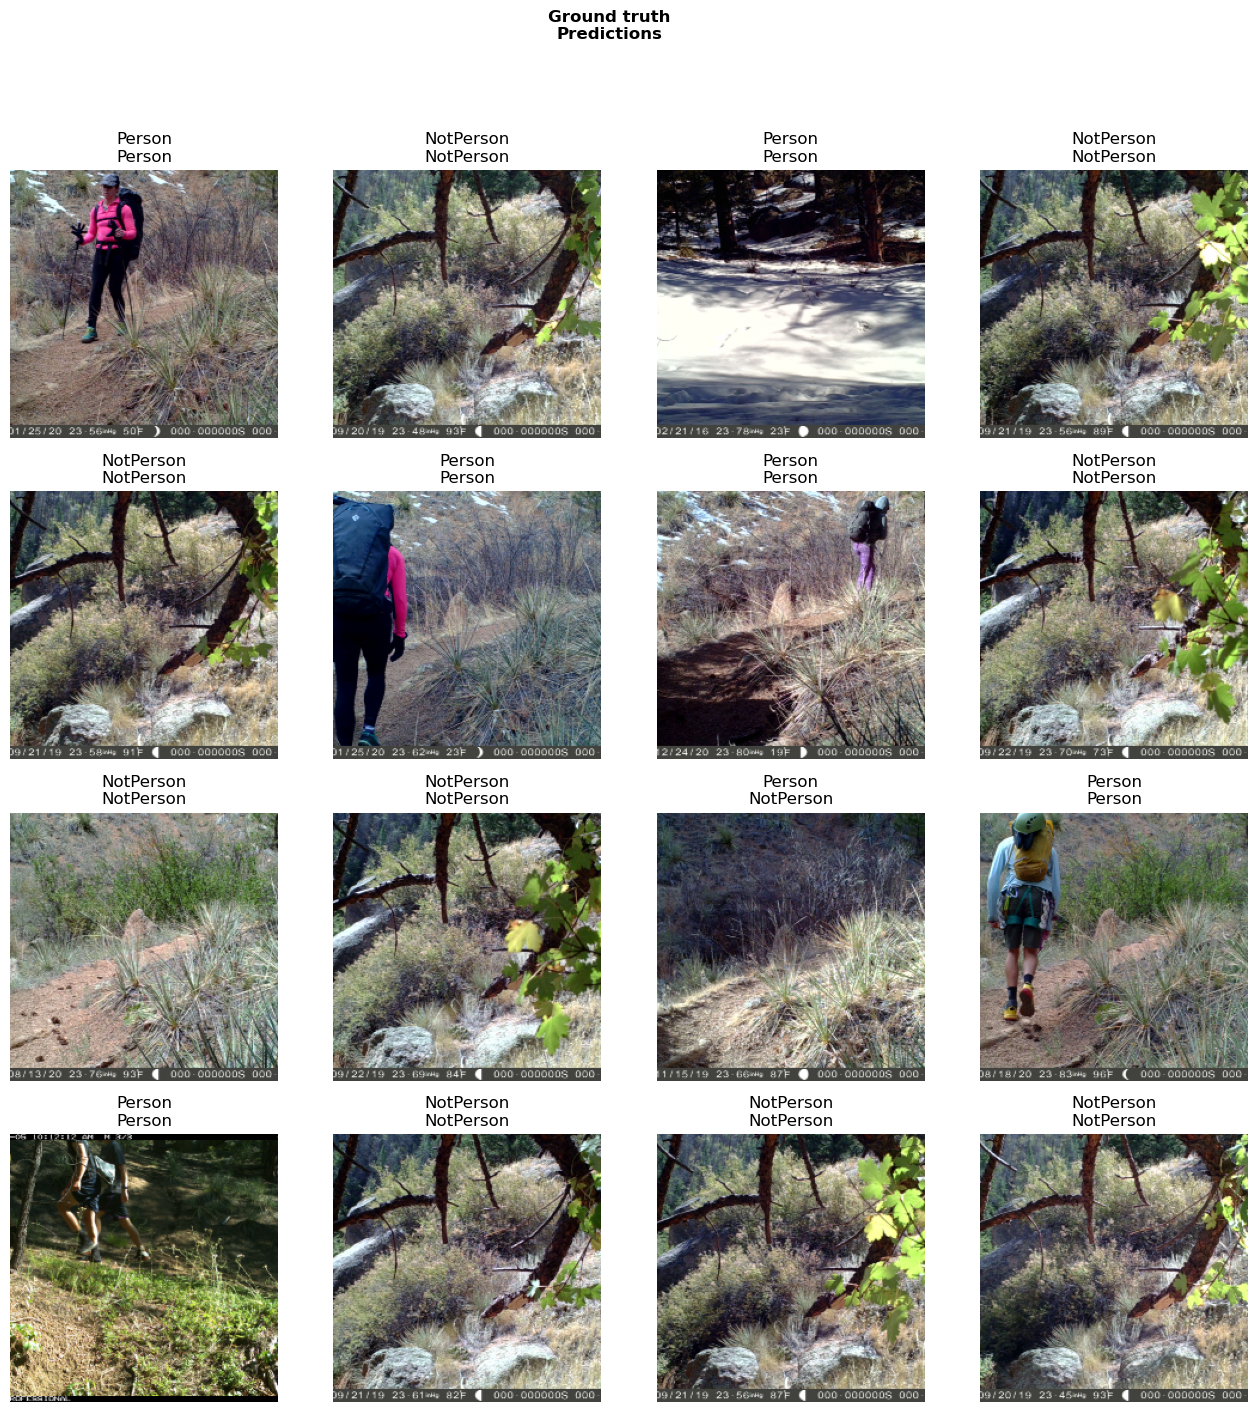

In [45]:
model.show_results(rows=8, thresh=0.9)

## Save Model

In [46]:
modelName = "PNP_ModelFull"

model.save(os.path.join(folderLoc,modelName))

Computing model metrics...


WindowsPath('M:/GIS/3_Resources/3_7_Scripts/Python/ML_ImageClassification_PersonNotPerson/TrainingData/PNP_ModelFull')

## Review Model Accuracy

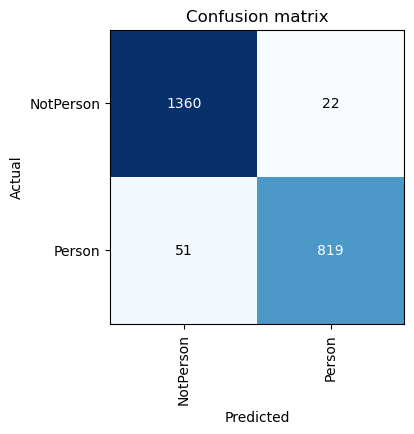

In [48]:
model.plot_confusion_matrix()

In [ ]:
model.plot_losses()

In [ ]:
photoPath = r"M:\GIS\2_Teams\2_4_Natural_Resources\Team_Projects\2019\20191014_CSD_Camera_Study\Formatted_Photos_Folders\Sunshine_2_20220131_2_entered\Sunshine_2_20220131_2_1\Sunshine_2_20220131_2_IMG_0148_N.JPG"
model.predict(photoPath, visualize=True, gradcam=True)